In [1]:
import pandas as pd
import os
import numpy as np
from sklearn import preprocessing

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data_training = pd.read_csv("/content/drive/My Drive/data poison/scenario1/50p_TRAINING_S1.csv")
data_testing = pd.read_csv("/content/drive/My Drive/data poison/scenario2/TESTING_NORMAL.csv")

In [4]:
#Shuffling the data for better results
#data=data.reindex(np.random.permutation(data.index))

In [5]:
#y = data['Label']
#data = data.drop(['Label','TimeStamp','TimeStamp_Readable','seconds_of_timestamp','CQ_AF3','CQ_T7','CQ_Pz','CQ_T8','CQ_AF4'], axis = 1)

In [6]:
#dropping the un-named Column
data_training = data_training.drop(data_training.columns[0], axis=1)
data_testing = data_testing.drop(data_testing.columns[0], axis=1)

In [7]:
y_train = data_training['Label']
x_train = data_training.drop(columns='Label', axis=1)
y_test = data_testing['Label']
x_test = data_testing.drop(columns='Label', axis=1)

In [8]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)
#X_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [9]:
#XGBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import xgboost as xgb

#fitting the model
model = xgb.XGBClassifier(random_state=42,gpu_id=0)
model.fit(x_train,y_train)
predict=model.predict(x_test)
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
cr = classification_report(y_test, predict)
print(cr)

Training Accuracy : 0.9532258064516129
Testing Accuracy : 0.3709677419354839
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        80
           2       0.00      0.00      0.00        74
           3       0.98      0.51      0.67        81
           4       0.28      0.99      0.43        75

    accuracy                           0.37       310
   macro avg       0.31      0.37      0.27       310
weighted avg       0.32      0.37      0.28       310



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


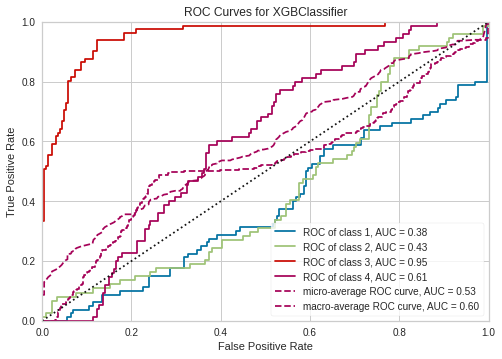

In [10]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model)

visualizer.fit(x_train, y_train)       
visualizer.score(x_test, y_test)       
visualizer.show()

In [11]:
def plot_confusion_matrix(y_test, result, classes, normalize=False, title=None, cmap=plt.cm.Blues):
 """
431 This function prints and plots the confusion matrix.
432 Normalization can be applied by setting ‘normalize=True‘.
433 """
 if not title:
  if normalize:
    title = 'Normalized confusion matrix'
  else:
    title = 'Confusion matrix, without normalization'

 # Compute confusion matrix
 cm = confusion_matrix(y_test, result)
# Only use the labels that appear in the data
# classes = classes[unique_labels(y_test, result)]
 if normalize:
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  print("Normalized confusion matrix")
 else:
  print('Confusion matrix, without normalization')
 print(cm)
 fig, ax = plt.subplots()
 im = ax.imshow(cm, interpolation='nearest', cmap = cmap)
 ax.figure.colorbar(im, ax=ax)
 # We want to show all ticks...
 ax.set(xticks=np.arange(cm.shape[1]),
  yticks = np.arange(cm.shape[0]),
  # ... and label them with the respective list entries
  xticklabels = classes, yticklabels = classes,
  title = title,
  ylabel ='True label',
  xlabel ='Predicted label')
 # Rotate the tick labels and set their alignment.
 plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
 rotation_mode = "anchor")
 # Loop over data dimensions and create text annotations.
 fmt = '.2f' if normalize else 'd'
 thresh = cm.max() / 2.
 for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
 fig.tight_layout()
 return ax

Confusion matrix, without normalization
[[ 0  0  0 80]
 [ 0  0  0 74]
 [ 0  0 41 40]
 [ 0  0  1 74]]
Normalized confusion matrix
[[0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.51 0.49]
 [0.   0.   0.01 0.99]]


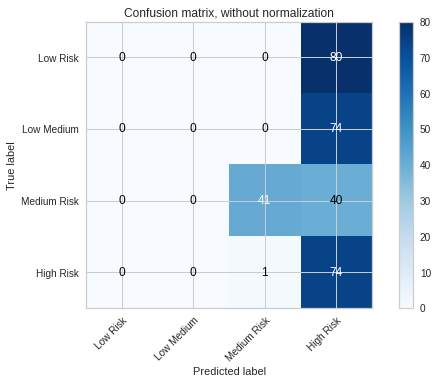

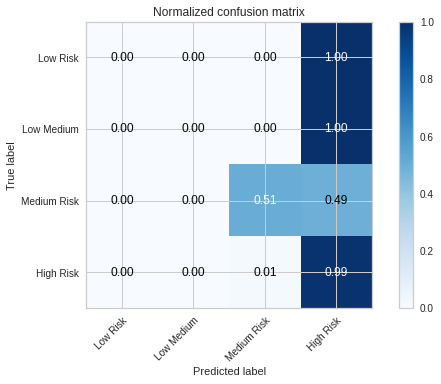

In [12]:
np.set_printoptions(precision=2)
class_names = ['Low Risk', 'Low Medium', 'Medium Risk', 'High Risk']
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, predict, classes=class_names,
title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, predict, classes=class_names,
normalize=True,
title='Normalized confusion matrix')
plt.show()

In [13]:
from sklearn import metrics
accu = metrics.accuracy_score(y_test, predict)
recall = metrics.recall_score(y_test, predict,average="micro")
precision = metrics.precision_score(y_test, predict,average="micro")
F1 = metrics.f1_score(y_test, predict,average="micro")
print(accu,recall,precision,F1)

0.3709677419354839 0.3709677419354839 0.3709677419354839 0.3709677419354839


In [14]:
#from sklearn.externals import joblib
import joblib
joblib.dump(model,"rf_joblib_model")
rf = joblib.load("rf_joblib_model")

In [15]:
!pip install eli5
!pip install shap
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.9 MB/s 
     |████████████████████████████████| 133 kB 41.2 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=9821ffd602a8908d921e8fe86d44a229a94d9450430a26414608fc89441ed939
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [16]:
# importing ML Explanability Libraries
#for purmutation importance
import eli5
from eli5.sklearn import PermutationImportance
#for SHAP values
import shap
from pdpbox import pdp, info_plots #for partial plots

In [17]:
perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0419 ± 0.0168,T7_THETA
0.0252 ± 0.0170,Pz_LOW_BETA
0.0239 ± 0.0240,T7_ALPHA
0.0219 ± 0.0103,Pz_HIGH_BETA
0.0194 ± 0.0041,Pz_THETA
0.0168 ± 0.0048,AF3_THETA
0.0161 ± 0.0071,T8_GAMMA
0.0142 ± 0.0190,T8_LOW_BETA
0.0142 ± 0.0088,Pz_ALPHA
0.0110 ± 0.0032,T7_LOW_BETA


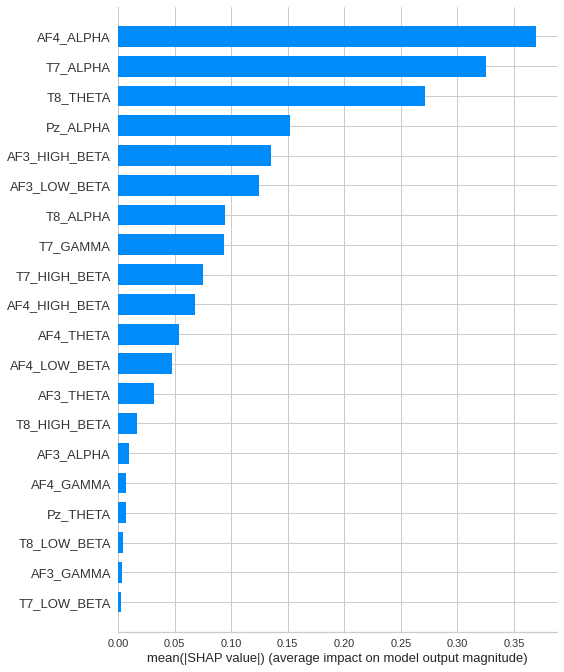

In [18]:
# let’s see the shap values, 2rd method
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[1], x_test, plot_type="bar")

In [19]:
def record_analysis(model, record):
 explainer = shap.TreeExplainer(model)
 shap_values = explainer.shap_values(record)
 shap.initjs()
 return shap.force_plot(explainer.expected_value[1], shap_values[1], record)

In [20]:
#1st Record
record = x_test.iloc[1,:].astype(float)
record_analysis(model, record)

In [21]:
#2nd Record
record = x_test.iloc[2,:].astype(float)
record_analysis(model, record)

In [22]:
from sklearn import tree

cls_t = tree.DecisionTreeClassifier()
cls_t.fit(x_test, predict)

DecisionTreeClassifier()

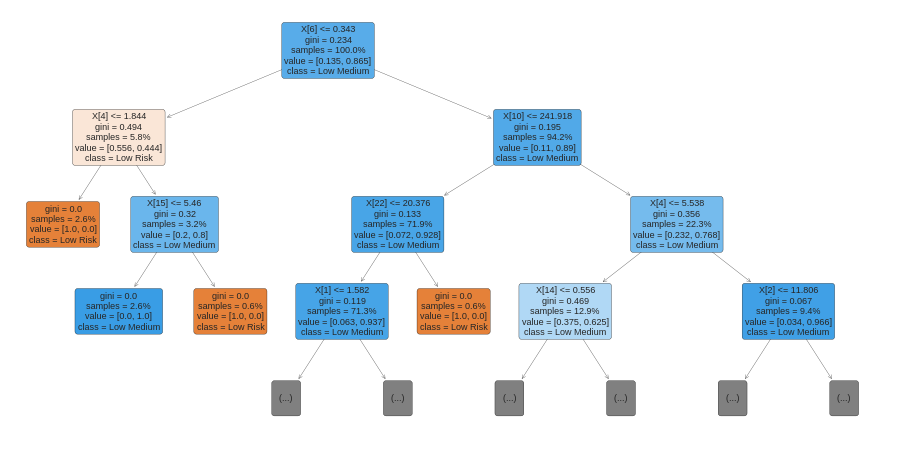

In [23]:
fig = plt.figure(figsize=(16, 8))
vis = tree.plot_tree(cls_t, class_names = class_names, max_depth=3, fontsize=9, proportion=True, filled=True, rounded=True)